# <a id='toc1_'></a>[UNIT 2. Statistical Learning](#toc0_)

This Unit includes main introduction to statistical learning, strongly based in {cite:p}`kroese2020`.

**Table of contents**<a id='toc0_'></a>    
- [UNIT 2. Statistical Learning](#toc1_)    
  - [Evaluation of the loss function in K-means](#toc1_1_)    
  - [Polynomial  regression](#toc1_2_)    
    - [Training data with fitted curves fordifferent $p$](#toc1_2_1_)    
    - [Test loss as function of the number of parameters $p$ of the model.](#toc1_2_2_)    
    - [Cross-validation](#toc1_2_3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Evaluation of the loss function in K-means](#toc0_)

K-means is an example of unsupervised learning method. We will use this method along with `scipy` in order to evaluate the loss function calculated for a given dataset.

We will first import some data using `numpy`. 

In [1]:
import numpy as np
Xmat = np.genfromtxt('datasets/clusterdata.csv', delimiter=',')
n, D = Xmat.shape
n,D

ImportError: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy C-extensions failed. This error can happen for
many reasons, often due to issues with your setup or how NumPy was
installed.

We have compiled some common reasons and troubleshooting tips at:

    https://numpy.org/devdocs/user/troubleshooting-importerror.html

Please note and check the following:

  * The Python version is: Python3.11 from "/home/jordivilla/miniconda3/bin/python"
  * The NumPy version is: "1.24.3"

and make sure that they are the versions you expect.
Please carefully study the documentation linked above for further help.

Original error was: libopenblas.so.0: cannot open shared object file: No such file or directory


The first thing to do is always a visualization of the data

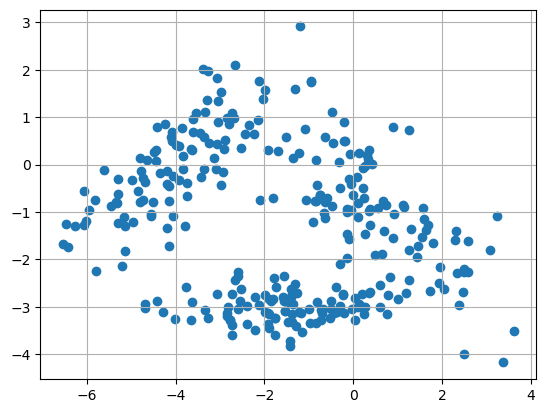

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(Xmat[:,0],Xmat[:,1])
ax.grid(True)
plt.savefig("../figures/data.png")
plt.show()


First, we will run a K-means using `scikit-learn`, a high level wrapper for machine learning with `python`

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3,random_state=0,n_init="auto").fit(Xmat)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2], d

In [ ]:
centers=kmeans.cluster_centers_
centers

array([[ 0.6177812 , -1.29975072],
       [-3.86806187,  0.04564101],
       [-1.84791126, -3.02916471]])

Now we plot again the clusters with colors for each label

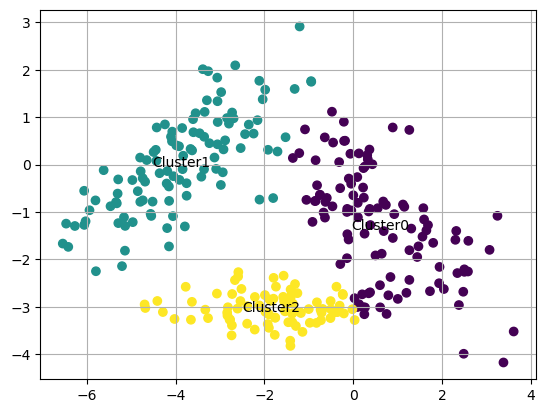

In [ ]:
labels=kmeans.labels_

cluster_name = ["Cluster"+str(i) for i in set(labels)]

fig, ax = plt.subplots()
ax.scatter(Xmat[:,0],Xmat[:,1],c=labels)
for i, txt in enumerate(cluster_name):
    ax.text(centers[i,0],centers[i,1],s=txt,ha="center",va="center")
ax.grid(True)

plt.show()

with `seaborn` we can also find a nice plot in a faster way

<Axes: >

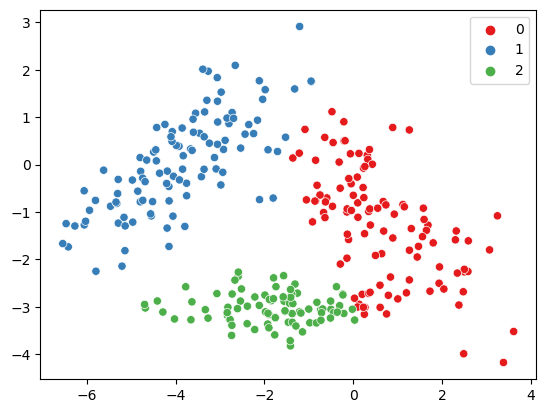

In [ ]:
import seaborn as sns
sns.scatterplot(x=Xmat[:,0],y=Xmat[:,1],hue=labels,legend='full',palette="Set1")

We will now run it in a more manual and detailed way, without the use of `scikit-learn` We start by initializing the centers.

In [ ]:
K = 3
c  = np.array([[-2.0,-4,0],[-3,1,-1]])  #initialize centers
cold = np.zeros(c.shape)
dist2 = np.zeros((K,n))
#for h in range(0,100):
while np.abs(c - cold).sum() > 0.001:
     print(c)
     cold = c.copy()
     for i in range(0,K): #compute the squared distances
          dist2[i,:] = np.sum((Xmat - c[:,i].T)**2, 1)
        
     label = np.argmin(dist2,0) #assign the points to nearest centroid
     minvals = np.amin(dist2,0)
     for i in range(0,K): # recompute the centroids
          c[:,i] = np.mean(Xmat[np.where(label == i),:], 1).reshape(1,2)

print('Loss = {:3.3f}'.format(minvals.mean()))
print(minvals)

[[-2. -4.  0.]
 [-3.  1. -1.]]
[[-1.97122735 -3.99500505  0.48593068]
 [-3.01536786  0.0589819  -1.24373331]]
[[-1.92700937 -3.94414519  0.56115053]
 [-3.01308366  0.02001296 -1.29804366]]
[[-1.9285638  -3.92373524  0.56115053]
 [-3.04155556  0.01309036 -1.29804366]]
Loss = 2.288
[1.10370659e+00 3.16794127e+00 9.26321472e-01 6.36198076e+00
 8.19130169e-02 7.65221873e-01 1.90343757e+00 3.87433330e-01
 3.42126461e+00 3.95242456e-02 1.28746860e+00 2.61470537e+00
 6.60069131e-01 9.83476613e-01 5.00950821e+00 9.27041473e+00
 9.08533546e-02 6.56955782e-01 8.42663900e-01 5.42274818e+00
 3.28259714e-01 1.39524393e+00 9.30193801e+00 4.87563968e-01
 1.39388416e-01 2.88914157e+00 1.68884217e-01 2.76846935e-01
 3.60211197e-01 1.99402612e+00 6.37654752e-01 5.54788080e-01
 7.14620966e-01 3.98814235e+00 2.64597189e+00 4.12086589e+00
 4.06560394e+00 6.19786157e+00 1.95279352e-01 5.87981054e+00
 7.81544253e-01 1.89578819e-02 1.58114767e+01 1.59106964e+00
 1.24970759e+00 1.54724188e+00 5.80169437e-01 2.

## <a id='toc1_2_'></a>[Polynomial  regression](#toc0_)

Let us generate data drawn from iid random points that have a normal distribution with expectation $10 − 140ui + 400u^2i − 250u^3$ and variance  25. This is an example of a polynomial regression model. Using a squared-error loss, the optimal prediction function $h^*(u) = E[Y | U = u]$ is thus

$$h^*(u) = 10 − 140^u + 400u^2 − 250u^3$$

In [ ]:
import numpy as np
from numpy.random import rand , randn

import matplotlib.pyplot as plt

def generate_data(beta , sig, n):  # generate data with the requested variance given by sig**2
   u = np.random.rand(n, 1)
   y = (u ** np.arange(0, 4)) @ beta + sig * np.random.randn(n, 1) # we use @ for matrix multiplication
   return u, y

np.random.seed(12)
beta = np.array([[10, -140, 400, -250]]).T
n = 100
sig = 5
u, y = generate_data(beta , sig, n)

# define the smooth line
xx = np.arange(np.min(u), np.max(u)+5e-3, 5e-3)
yy = np.polyval(np.flip(beta), xx)     # evaluate the polynomial

plt.plot(u, y, '.', markersize=8)
plt.plot(xx, yy, '--',linewidth=3)

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
plt.xlabel(r'$u$')
plt.ylabel(r'$h^*(u)$')
plt.legend(['data points','true'])
plt.savefig('../figures/polydatpy.pdf',format='pdf')
plt.show()
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

ImportError: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy C-extensions failed. This error can happen for
many reasons, often due to issues with your setup or how NumPy was
installed.

We have compiled some common reasons and troubleshooting tips at:

    https://numpy.org/devdocs/user/troubleshooting-importerror.html

Please note and check the following:

  * The Python version is: Python3.11 from "/home/jordivilla/miniconda3/bin/python"
  * The NumPy version is: "1.24.3"

and make sure that they are the versions you expect.
Please carefully study the documentation linked above for further help.

Original error was: libopenblas.so.0: cannot open shared object file: No such file or directory


### <a id='toc1_2_1_'></a>[Training data with fitted curves fordifferent $p$](#toc0_)

We will check the models for $p = 2, 4, 16$. The true cubic polynomial curve for p = 4 is also plotted (dashed line).

/tmp/ipykernel_63313/2927019202.py:12: RuntimeWarning: invalid value encountered in matmul
  betahat[p] = solve(X.T @ X, X.T @ y)


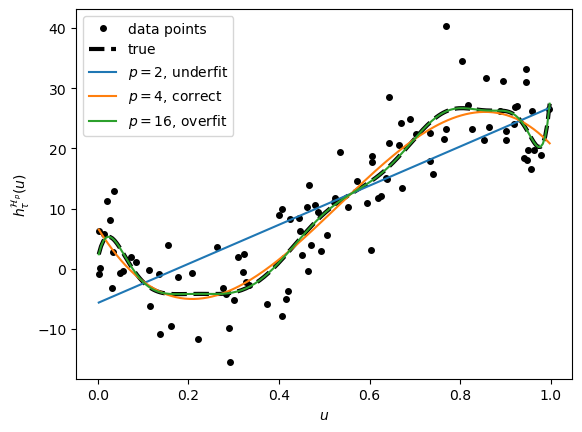

In [ ]:
from numpy.linalg import norm , solve

max_p = 18
p_range = np.arange(1, max_p + 1, 1)
X = np.ones((n, 1))
betahat, trainloss = {}, {}

for p in p_range:  # p is the number of parameters
    if p > 1:
        X = np.hstack((X, u**(p-1)))  # add column to matrix

    betahat[p] = solve(X.T @ X, X.T @ y)
    trainloss[p] = (norm(y - X @ betahat[p])**2/n)

p = [2, 4, 16]  # select three curves

#replot the points and true line and store in the list "plots"
plots = [plt.plot(u, y, 'k.', markersize=8)[0], 
         plt.plot(xx, yy, 'k--',linewidth=3)[0]]
# add the three curves
for i in p:
    yy = np.polyval(np.flip(betahat[i]), xx)
    plots.append(plt.plot(xx, yy)[0])

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
plt.xlabel(r'$u$')
plt.ylabel(r'$h^{\mathcal{H}_p}_{\tau}(u)$')
plt.legend(plots,('data points', 'true','$p=2$, underfit',
                  '$p=4$, correct','$p=16$, overfit','d'))
plt.savefig('../figures/polyfitpy.pdf',format='pdf')
plt.show()
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

### <a id='toc1_2_2_'></a>[Test loss as function of the number of parameters $p$ of the model.](#toc0_)

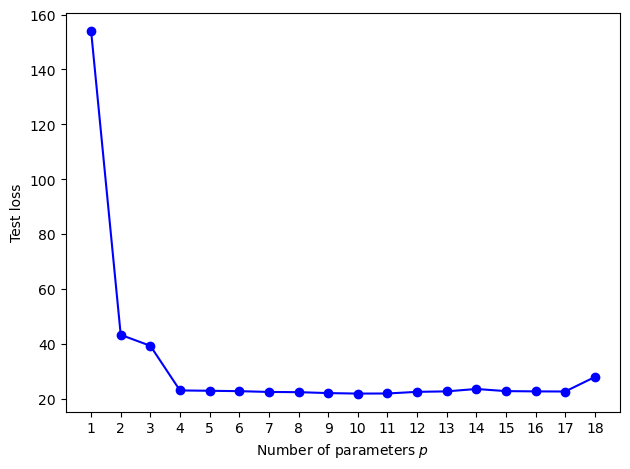

In [ ]:
# generate test data
u_test, y_test = generate_data(beta, sig, n)

MSE = []
X_test = np.ones((n, 1))

for p in p_range:
    if p > 1:
        X_test = np.hstack((X_test, u_test**(p-1)))

    y_hat = X_test @ betahat[p]  # predictions
    MSE.append(np.sum((y_test - y_hat)**2/n))   # calculate the mean square error

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
plt.plot(p_range, MSE, 'b', p_range, MSE, 'bo')
plt.xticks(ticks=p_range)
plt.xlabel('Number of parameters $p$')
plt.ylabel('Test loss')
plt.tight_layout()
plt.savefig('../figures/MSEpy.pdf',format='pdf')
plt.show()
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

### <a id='toc1_2_3_'></a>[Cross-validation](#toc0_)

For the polynomial regression example, we can calculate a $K$-fold cross-validation loss with a nonrandom partitioning of the training set using the following code.

/tmp/ipykernel_63313/2728808787.py:20: RuntimeWarning: invalid value encountered in matmul
  betahat = solve(X_train.T @ X_train, X_train.T @ y_train)


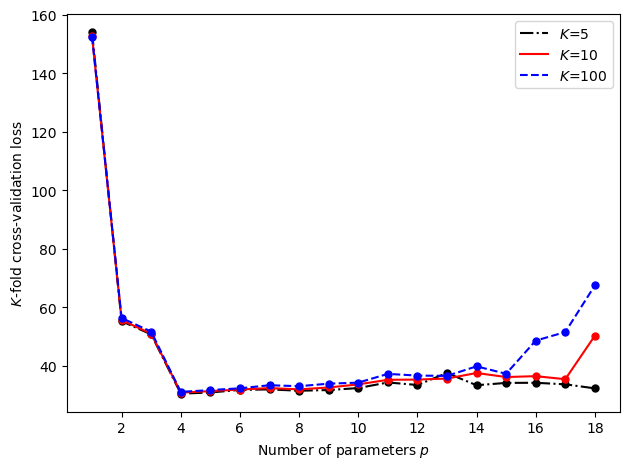

In [ ]:
K_vals = [5, 10, 100]  # number of folds
cv = np.zeros((len(K_vals), max_p))
X = np.ones((n, 1))

for p in p_range:
    if p > 1:
        X = np.hstack((X, u**(p-1)))
    j = 0
    for K in K_vals:
        loss = []
        for k in range(1, K+1):
            # integer indices of test samples
            test_ind = ((n/K)*(k-1) + np.arange(1, n/K + 1) - 1).astype('int')
            train_ind = np.setdiff1d(np.arange(n), test_ind)

            X_train, y_train = X[train_ind, :], y[train_ind, :]
            X_test, y_test = X[test_ind, :], y[test_ind]

            # fit model and evaluate test loss
            betahat = solve(X_train.T @ X_train, X_train.T @ y_train)
            loss.append(norm(y_test - X_test @ betahat) ** 2)

        cv[j, p-1] = sum(loss) / n
        j += 1

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
p1 = plt.plot(p_range, cv[0, :], 'k-.', p_range, cv[0, :], 'k.', markersize=10)[0]
p2 = plt.plot(p_range, cv[1, :], 'r', p_range, cv[1, :], 'r.', markersize=10)[0]
p3 = plt.plot(p_range, cv[2, :], 'b--', p_range, cv[2, :], 'b.', markersize=10)[0]
plt.xticks(range(2, 19, 2))
plt.xlabel('Number of parameters $p$')
plt.ylabel('$K$-fold cross-validation loss')
plt.legend((p1,p2,p3),('$K$=5','$K$=10','$K$=100'))
plt.tight_layout()
plt.savefig('../figures/crossvalpy.pdf',format='pdf')
plt.show()
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


```{bibliography}
:style: unsrt
```